In [20]:
%matplotlib inline

import pandas as pd
import numpy as np
import scipy
import matplotlib
import matplotlib.pyplot as plt
# import librosa


In [4]:
songs = pd.read_csv("data/small_dbsongs_all_b.csv", index_col=0)
songs = songs.drop_duplicates()
songs = songs.reset_index()

In [5]:
# convert string into arrays 
def string_to_array(string):
    array = string[1:-1].split(',')
    for i, a in enumerate(array):
        try:
            array[i] = float(a)
        except:
            array[i] = 0.
    return array

In [27]:
def field_to_array(field_name):
    field = songs[field_name].values
    field_val = [string_to_array(field[i]) for i in range(len(field))]
    
    return np.array(field_val)

In [28]:
fields = ['sections_confidence',
 'sections_start',
 'segments_confidence',
 'segments_loudness_max_time',
 'segments_loudness_start',
 'segments_pitches',
 'segments_start',
 'segments_timbre']

sections_start = field_to_array('sections_start')
sections_confidence = field_to_array('sections_confidence')

segments_start = field_to_array('segments_start')
segments_loudness_start = field_to_array('segments_loudness_start')
segments_loudness_max_time = field_to_array('segments_loudness_max_time')
segments_pitches = field_to_array('segments_pitches')
segments_confidence = field_to_array('segments_confidence')
segments_timbre = field_to_array('segments_timbre')

In [29]:
segments_start[0][:10]

[0.0,
 0.40336,
 0.75896,
 1.10544,
 1.47156,
 1.79633,
 2.17379,
 2.51098,
 2.85356,
 3.20658]

In [30]:
segments_loudness_max_time[0][:10]

[0.08092,
 0.02016,
 0.0281,
 0.03661,
 0.01709,
 0.03391,
 0.01757,
 0.01974,
 0.03268,
 0.03967]

In [31]:
segments_loudness_start[0][:10]

[-47.21,
 -33.18,
 -34.054,
 -31.296,
 -31.877,
 -32.98,
 -32.406,
 -32.686,
 -34.0,
 -33.279]

In [32]:
segments_pitches[0][:10]

[0.0, 0.576, 0.664, 0.98, 0.846, 1.0, 0.898, 0.754, 0.675, 0.291]

In [33]:
segments_timbre[0][:10]

[0.0,
 -81.153,
 33.662,
 -1.596,
 -22.445,
 45.887,
 14.597,
 14.259,
 -19.297,
 23.866]

In [34]:
np.fft.fft(segments_timbre[0], n=10)

array([  7.78      +0.00000000e+00j, -85.35804426+4.82133597e+01j,
         3.89306675+2.42021145e+01j, -31.98645574+1.56917224e+02j,
       106.93443325+1.05401881e+02j,   5.254     +7.10542736e-14j,
       106.93443325-1.05401881e+02j, -31.98645574-1.56917224e+02j,
         3.89306675-2.42021145e+01j, -85.35804426-4.82133597e+01j])

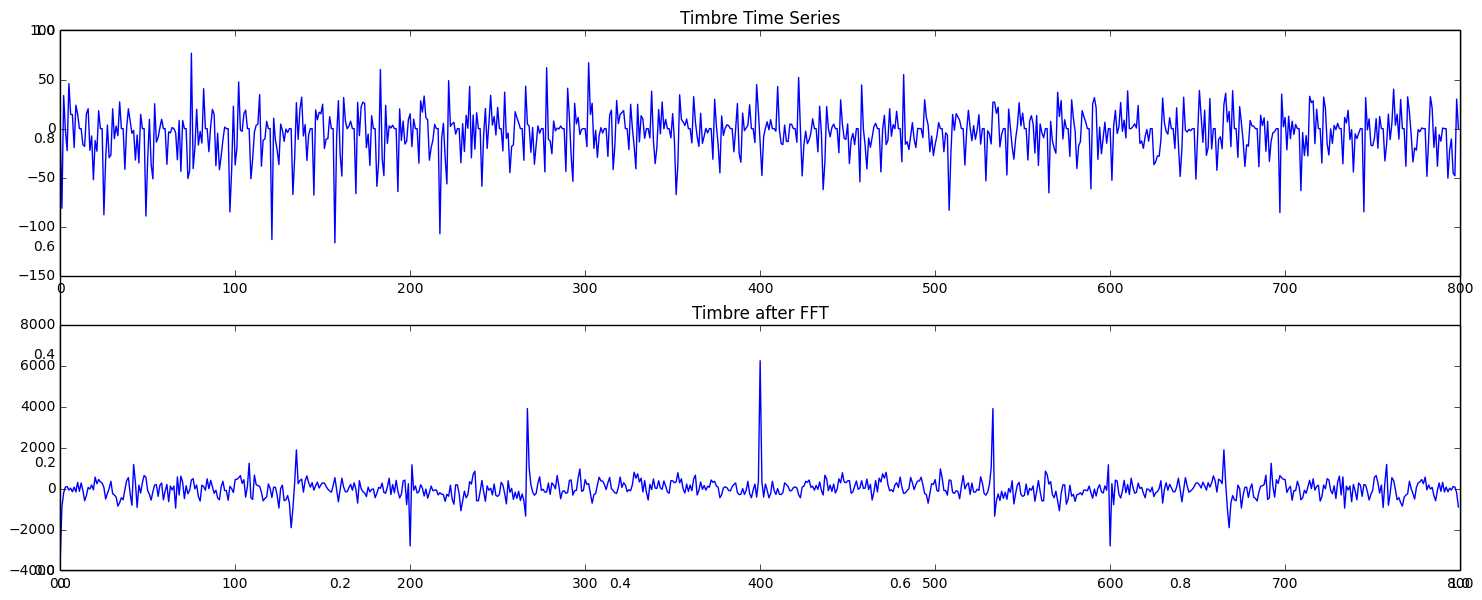

In [94]:
# plot the first song timbre from 0 to 100 
TIMBRE_X_RANGE = 800

fig = plt.figure(figsize=(20, 8))
plt.title('Timbre Time Series')
fig.add_subplot(211)
plt.plot(np.arange(TIMBRE_X_RANGE), segments_timbre[0][:TIMBRE_X_RANGE])


segments_timbre_fft = np.fft.fft(segments_timbre[0][:TIMBRE_X_RANGE])
fig.add_subplot(212)
plt.title('Timbre after FFT')
plt.plot(np.arange(TIMBRE_X_RANGE), segments_timbre_fft)

fig.subplots_adjust(left=0.2, wspace=0.8, top=0.8)

fig.show()
#type(segments_pitches)

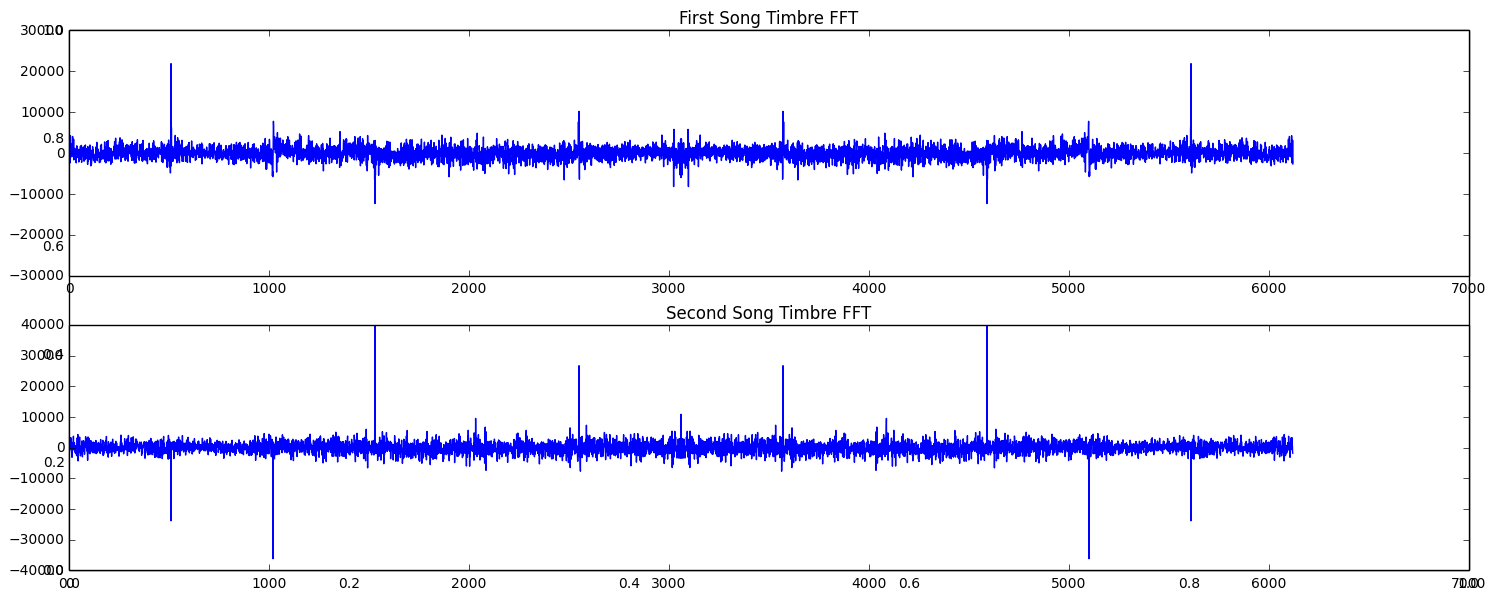

In [115]:
SMALL_RANGE = min(len(segments_timbre[1]), len(segments_timbre[6]))

segments_timbre_fft1 = np.fft.fft(segments_timbre[1], n = SMALL_RANGE)
segments_timbre_fft2 = np.fft.fft(segments_timbre[6], n = SMALL_RANGE)

fig = plt.figure(figsize=(20, 8))
plt.title('First Song Timbre FFT')
fig.add_subplot(211)
plt.plot(np.arange(SMALL_RANGE), segments_timbre_fft1)


fig.add_subplot(212)
plt.title('Second Song Timbre FFT')
plt.plot(np.arange(SMALL_RANGE), segments_timbre_fft2)

fig.subplots_adjust(left=0.2, wspace=0.8, top=0.8)

fig.show()

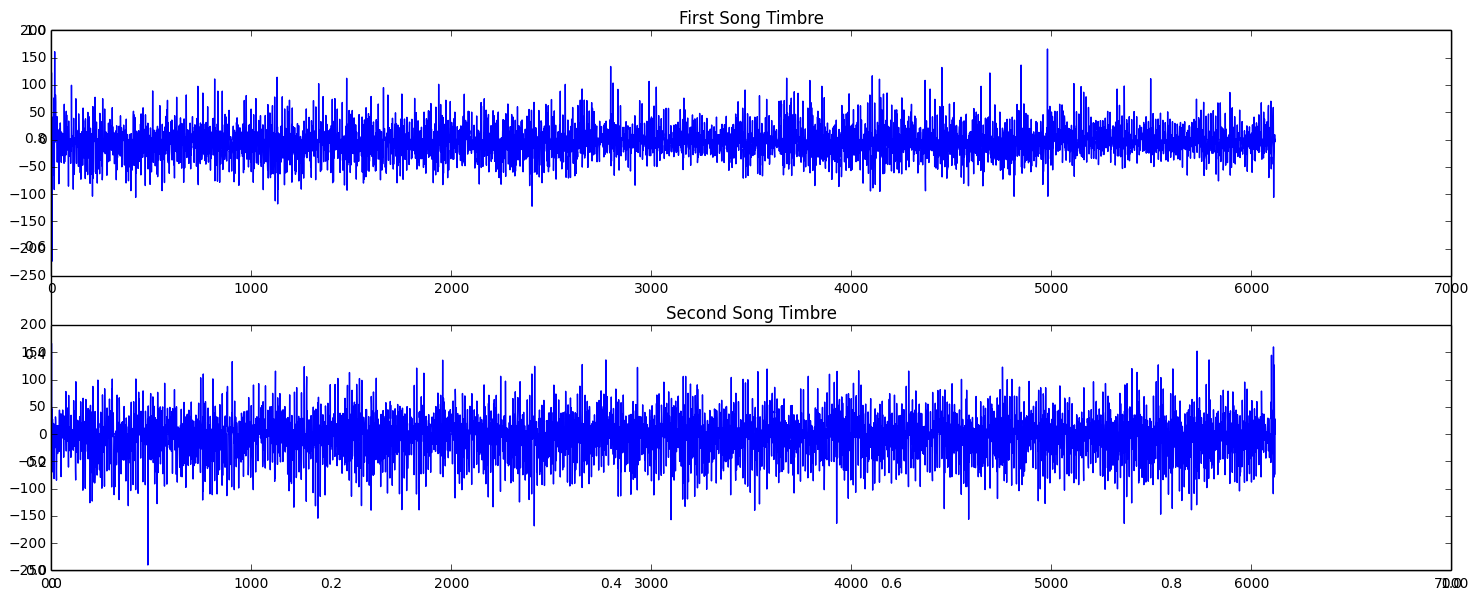

In [110]:
SMALL_RANGE = 500

# print len(segments_timbre[1])
# print len(segments_timbre[6])

rg = min(len(segments_timbre[1]), len(segments_timbre[6]))



fig = plt.figure(figsize=(20, 8))
plt.title('First Song Timbre')
fig.add_subplot(211)
plt.plot(np.arange(rg), segments_timbre[1][:rg])


fig.add_subplot(212)
plt.title('Second Song Timbre')
plt.plot(np.arange(rg), segments_timbre[6][:rg])

fig.subplots_adjust(left=0.2, wspace=0.8, top=0.8)

fig.show()

In [114]:
print "mean of the array"
print np.mean(segments_timbre[1])
print np.mean(segments_timbre[6])
print "---------------------------"
print "range of array (max - min)"
print np.ptp(segments_timbre[1])
print np.ptp(segments_timbre[6])
print "---------------------------"
print "mean after fft"
print np.mean(np.fft.fft(segments_timbre[1]))
print np.mean(np.fft.fft(segments_timbre[6]))
print "---------------------------"
print "range after fft"
print np.ptp(np.fft.fft(segments_timbre[1]))
print np.ptp(np.fft.fft(segments_timbre[6]))


mean of the array
-3.3032982005141385
-3.0208245098039215
---------------------------
range of array (max - min)
605.601
406.379
---------------------------
mean after fft
(-7.388183181497309e-13+5.735973440487363e-13j)
(-2.853316711444481e-14+7.133291778611202e-14j)
---------------------------
range after fft
(66097.42956369315+3750.4859486564806j)
(76091.38650000008+66799.07645189803j)


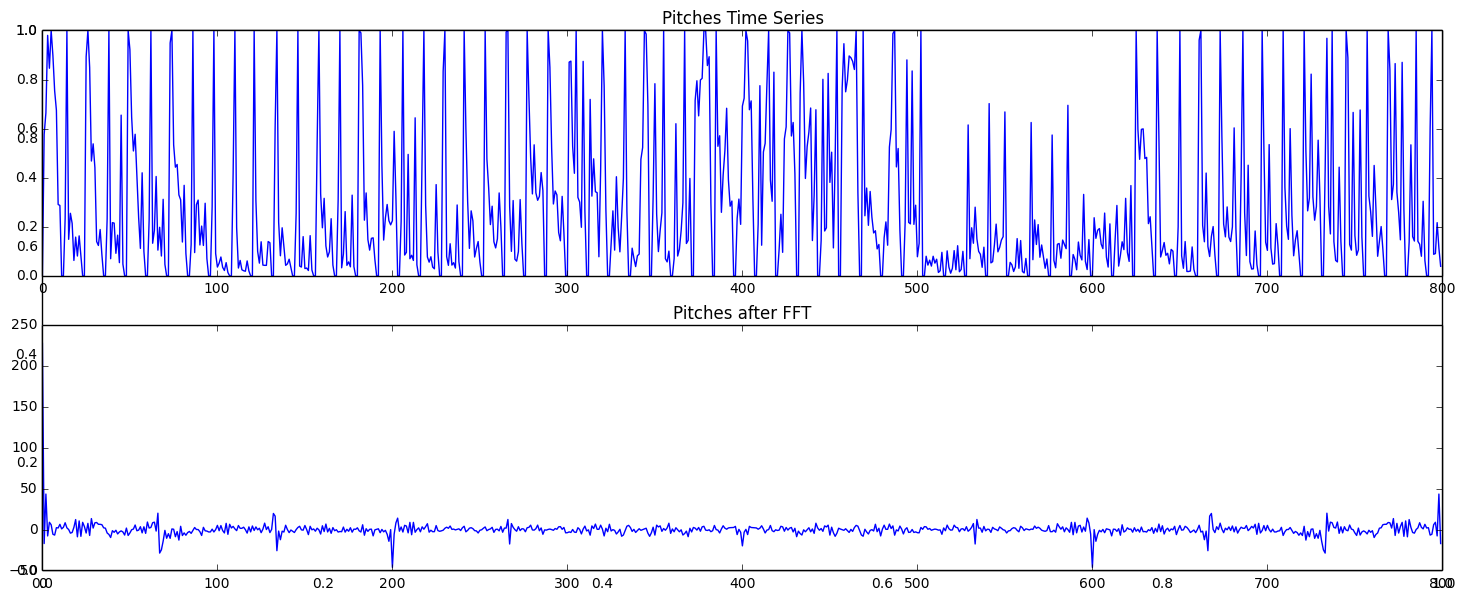

In [89]:
# plot the first song timbre from 0 to 100 

PITCHES_X_RANGE = 800

fig1 = plt.figure(figsize=(20, 8))
plt.title('Pitches Time Series')
orig_pitches = fig1.add_subplot(211)
orig_pitches.plot(np.arange(PITCHES_X_RANGE), segments_pitches[0][:PITCHES_X_RANGE])

segments_pitches_fft = np.fft.fft(segments_pitches[0][:PITCHES_X_RANGE])

fft_pitches = fig1.add_subplot(212)
plt.title('Pitches after FFT')
fft_pitches.plot(np.arange(PITCHES_X_RANGE), segments_pitches_fft)

fig1.subplots_adjust(left=0.2, wspace=0.8, top=0.8)

fig1.show()